# Training session of Single Classifier with ADNI Dataset
In this session, we will see the training of a simple CNN architecture using the preprocessed and augmented ADNI dataset. 

* The dataset consist of 1,80,000 images belonging to 1,500 patients.
* The dataset is automatically split into training and validation set using the parameter - **validation split** of Image DataGenerator.

* It was observed that the model was able to gain an accuracy of **86%** .








### Import ADNI Dataset
Here the dataset is loaded using the google drive link which is then unzipped.

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1JkPdI1s2vBVYaOpLRp0YT4AANBc1zvMi' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1JkPdIiwJ3BVYaOpLR1s2v4AANBc1zvMi" -O ADNI && rm -rf /tmp/cookies.txt


In [ ]:
!unzip ADNI

### Import Tensorflow and other necessary libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import GlobalAveragePooling2D

import numpy as np 


import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Initialize necessary parameters of the model

In [ ]:
batch_size = 64
epochs = 30
IMG_HEIGHT = 256
IMG_WIDTH = 256
NUM_LABELS = 3

In [ ]:
def plotImagesNumpy(images_arr):
'''
This function is used to plot the images. Here the input is the corresponding image array.

Why have we used this function ?
 - Well, it is used to make sure that the batches of train and validation generators have proper images :)

'''
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
      img = np.squeeze(img)
      ax.imshow(img)
      ax.axis('off')
    print("Shape of image: ", img.shape)
    plt.tight_layout()
    plt.show()

### Initialize train and validation data generators

Found 170178 images belonging to 3 classes.
Shape of image:  (256, 256)


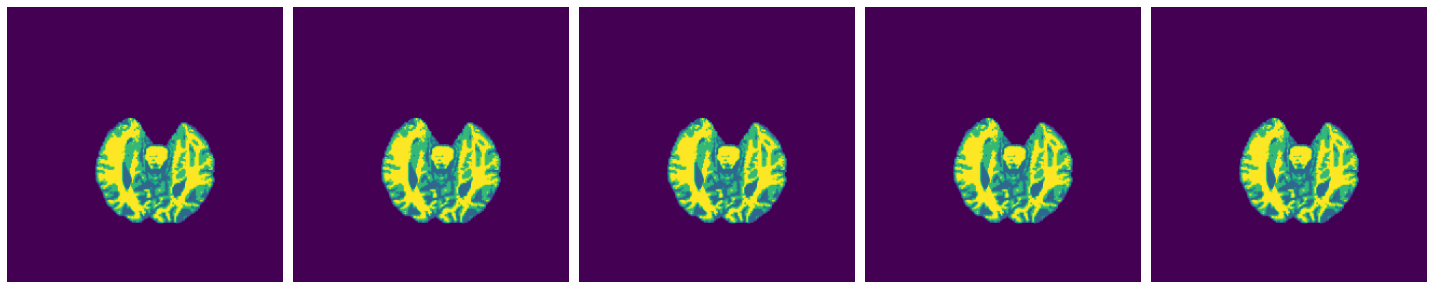

Found 18908 images belonging to 3 classes.
Shape of image:  (256, 256)


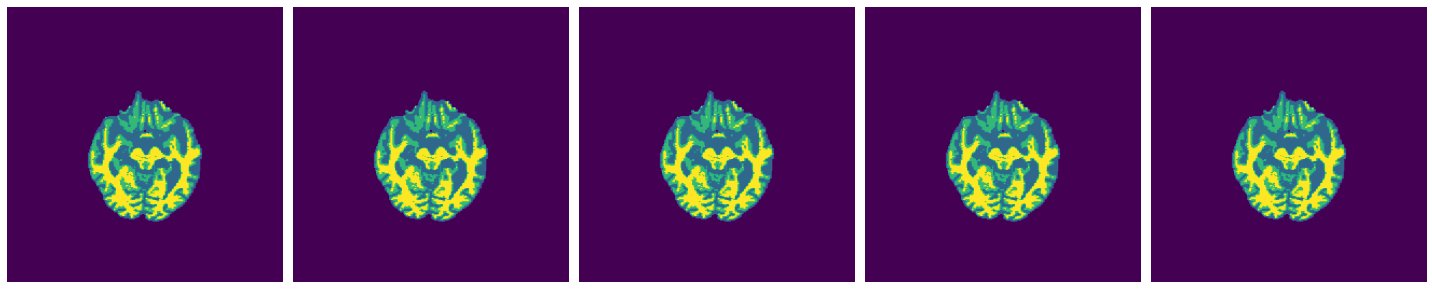

In [ ]:
train_dir = '/content/ADNI_Dataset_180k'

image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    validation_split = 0.1
                    )

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     color_mode="grayscale",
                                                     subset = 'training',
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImagesNumpy(augmented_images)

val_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                 directory=train_dir,
                                                 shuffle = False,
                                                 color_mode="grayscale",
                                                 subset = 'validation',
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')

augmented_images = [val_data_gen[0][0][0] for i in range(5)]
plotImagesNumpy(augmented_images)

### Set up model

In [ ]:
single_classifier = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,1)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.4),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(units=NUM_LABELS, activation='softmax')
])

### Compile model and initialize training

In [ ]:
single_classifier.compile(optimizer='adam',
                  loss="categorical_crossentropy",
                  metrics=['accuracy'])

single_classifier.summary()

In [ ]:
train_size = 170178
validation_size = 18908

history = single_classifier.fit_generator(
    train_data_gen,
    steps_per_epoch=train_size // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=validation_size // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
2659/2659 [==============================] - 769s 289ms/step - loss: 1.0269 - accuracy: 0.4660 - val_loss: 0.9826 - val_accuracy: 0.5112
Epoch 2/30
2659/2659 [==============================] - 782s 294ms/step - loss: 0.8605 - accuracy: 0.5977 - val_loss: 0.7926 - val_accuracy: 0.6434
Epoch 3/30
2659/2659 [==============================] - 714s 269ms/step - loss: 0.6636 - accuracy: 0.7142 - val_loss: 0.6605 - val_accuracy: 0.7132
Epoch 4/30
2659/2659 [==============================] - 710s 267ms/step - loss: 0.5035 - accuracy: 0.7931 - val_loss: 0.5665 - val_accuracy: 0.7617
Epoch 5/30
2659/2659 [==============================] - 703s 264ms/step - loss: 0.3842 - accuracy: 0.8478 - val_loss: 0.5351 - val_accuracy: 0.7845
Epoch 6/30
2659/2659 [==============================] - 703s 264ms/step - loss: 0.3011 - accuracy: 0.8840 - val_loss: 0.4509 - val_accuracy: 0.8253
Epoch 7/30
2659/2659 [==============

### Plot Graphs
The following graphs are plotted :
* Train & Validation Accuracy vs Training size.
* Train & Validation Loss vs Training size.
* Train & Validation Accuracy vs Epochs.
* Train & Validation Loss vs Epochs.

#### Epochs vs Accuracy & Loss

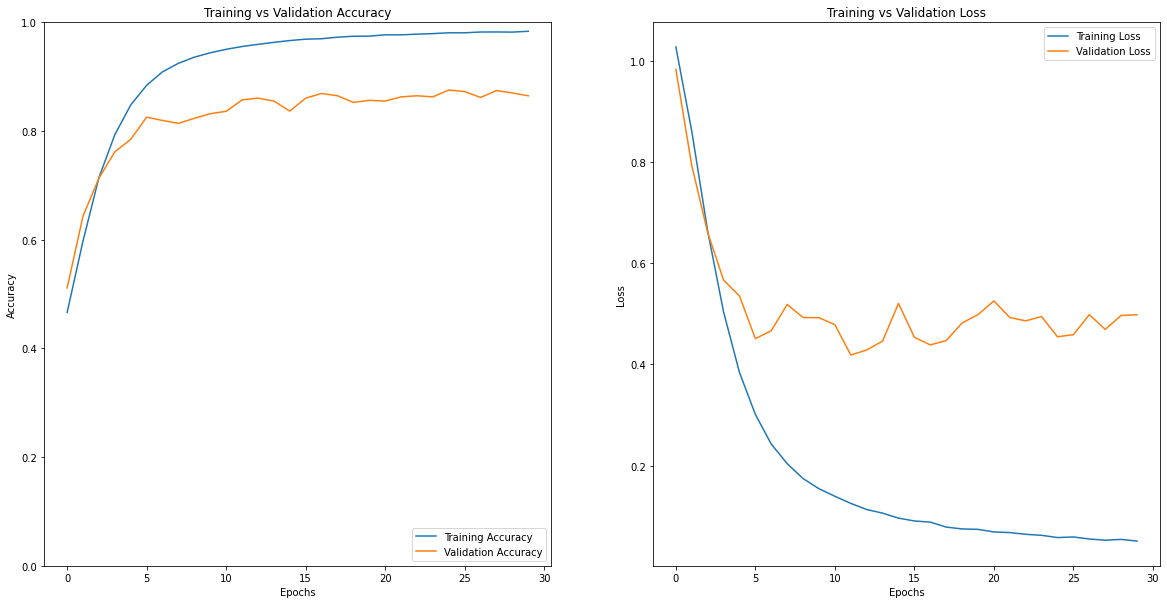

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=30
epochs_range = range(epochs)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0,1])

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

#### Data size vs Accuracy & Loss

In order to understand the improvement of model with respect to the increase in data, the remaining two graphs are plotted and it is done in the following manner : 

* Validation dataset is kept constant. (0.1% of total data - 18,908 images)
* Train dataset is gradually increased by changing the validation split.
* Initially, the train dataset consist of 51,055 images which is then gradually increased. 



##### Import train and validation set

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ek4zYT7OkZMsdfsxFaeSKkSr1c8YZYUHw' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ek4zYT7OkZM8FpxFaeSKkSr1c8YZYUHw" -O TRAIN && rm -rf /tmp/cookies.txt

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1m_AsLlHaTuiKItKY5Wsadad1HGOK_uxe6f2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1m_AsLlHaTuiKItKY5WpC1HGOK_uxe6f2" -O VAL && rm -rf /tmp/cookies.txt


In [ ]:
!unzip TRAIN
!unzip VAL

##### Set up train and validation generators

In [ ]:
# create train and validation datasets
def create_dataset(val_split):
  train_dir = '/content/ADNI_Train_Dataset_170k'

  val_dir = '/content/ADNI_Val_Dataset_18k'

  image_gen_train = ImageDataGenerator(
      rescale=1./255,
      validation_split = val_split
      )
  
  # Note that for validation dataset, a seperate instance of Image DataGenerator is created.
  datagen = ImageDataGenerator(rescale=1./255)
  
  train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                       directory=train_dir,
                                                       shuffle=True,
                                                       color_mode="grayscale",
                                                       subset = 'training',
                                                       target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                       class_mode='categorical')
  val_data_gen = datagen.flow_from_directory(batch_size=batch_size,
                                                     directory=val_dir,
                                                     shuffle = False,
                                                     color_mode="grayscale",
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')
  return train_data_gen,val_data_gen


In [ ]:
# study of training set size for a simple CNN Architecture
from numpy import mean
from matplotlib import pyplot
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization



# evaluate  model
def evaluate_model(train_data_gen,val_data_gen,val_split):
	# variables
  batch_size = 64
  epochs = 15
  IMG_HEIGHT = 256
  IMG_WIDTH = 256
  NUM_LABELS = 3
  
  #create model
  single_classifier = Sequential([
                                   Conv2D(16, 3, padding='same', activation='relu', 
                                          input_shape=(IMG_HEIGHT, IMG_WIDTH ,1)),
                                   MaxPooling2D(),
                                   Conv2D(32, 3, padding='same', activation='relu'),
                                   MaxPooling2D(),
                                   Conv2D(64, 3, padding='same', activation='relu'),
                                   MaxPooling2D(),
                                   Conv2D(128, 3, padding='same', activation='relu'),
                                   MaxPooling2D(),
                                   Dropout(0.4),
                                   Flatten(),
                                   Dense(512, activation='relu'),
                                   Dense(units=NUM_LABELS, activation='softmax')
                                   ])
  # compile model
  single_classifier.compile(optimizer='adam',
                             loss="categorical_crossentropy",
                             metrics=['accuracy'])
  total_size = 170178
  val_size = 18908

  #calculating steps_per_epoch and validation_steps
  steps = ((1-val_split)*total_size)//batch_size
  val_steps = (val_size)//batch_size

  #Initialize training
  trained_model = single_classifier.fit_generator(
      train_data_gen,
      steps_per_epoch=steps,
      epochs=epochs,
      validation_data=val_data_gen,
      validation_steps=val_steps
      )

  return trained_model

In [ ]:
def evaluate_size(val_split):
  #Define and initialize variables
  validation_accuracy,accuracy,validation_loss,train_loss = list(),list(),list(),list()
  train_generator,val_generator = create_dataset(val_split)

  trained_model= evaluate_model(train_generator,val_generator,val_split)

  validation_accuracy.append(trained_model.history['val_accuracy'])
  accuracy.append(trained_model.history['accuracy'])
  validation_loss.append(trained_model.history['val_loss'])
  train_loss.append(trained_model.history['loss'])
  
  return validation_accuracy,accuracy,validation_loss,train_loss


In [ ]:
# Define dataset sizes to evaluate
sizes = [0.7,0.6,0.5,0.4,0.3,0.2,0.1] 

'''

 The values in variable 'sizes' are actually the validation splits.
 Say, initially the val_split = 0.7, then 30% of the data is taken for training which is
 then gradually increased as 40% -> 50% -> 60% -> 70% -> 80% -> 90% .

'''

# Define variables
final_validation_accuracy,final_train_accuracy,final_validation_loss,final_train_loss= list(), list(),list(), list()
for validation_split in sizes:
  # repeated evaluate model with training set size
  val_accuracy,train_acc,val_loss,loss = evaluate_size(validation_split)
  # summarize score for size
  mean_score = mean(test_acc)
  final_validation_accuracy.append(mean_score)
 
  mean_score_1 = mean(train_acc)
  final_train_accuracy.append(mean_score_1)
 
  mean_score_2 = mean(val_loss)
  final_validation_loss.append(mean_score_2)
 
  mean_score_3 = mean(loss)
  final_train_loss.append(mean_score_3)

Found 51055 images belonging to 3 classes.
Found 18908 images belonging to 3 classes.
Epoch 1/15
797/797 [==============================] - 230s 288ms/step - loss: 1.0623 - accuracy: 0.4299 - val_loss: 1.1127 - val_accuracy: 0.4003
Epoch 2/15
797/797 [==============================] - 226s 284ms/step - loss: 0.9659 - accuracy: 0.5217 - val_loss: 1.1137 - val_accuracy: 0.4636
Epoch 3/15
797/797 [==============================] - 225s 282ms/step - loss: 0.7938 - accuracy: 0.6407 - val_loss: 1.1393 - val_accuracy: 0.5104
Epoch 4/15
797/797 [==============================] - 225s 282ms/step - loss: 0.5929 - accuracy: 0.7505 - val_loss: 1.1357 - val_accuracy: 0.5553
Epoch 5/15
797/797 [==============================] - 223s 279ms/step - loss: 0.4171 - accuracy: 0.8351 - val_loss: 1.3625 - val_accuracy: 0.5720
Epoch 6/15
797/797 [==============================] - 222s 278ms/step - loss: 0.2905 - accuracy: 0.8901 - val_loss: 1.5585 - val_accuracy: 0.5940
Epoch 7/15
797/797 [==================

##### Plot graphs

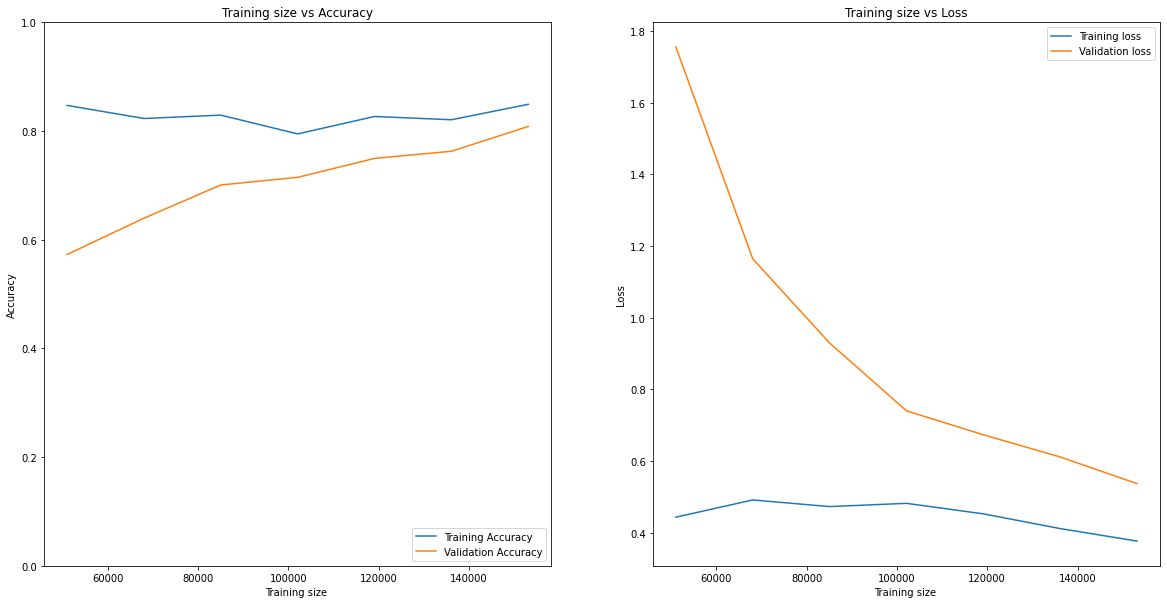

In [ ]:
# summarize relationship of train size to validation & train accuracy

train_data_size = [51055,68073,85090,102108,119126,136144,153162]

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(train_data_size,final_train_accuracy, label='Training Accuracy ')
plt.plot(train_dat_size,final_validation_accuracy, label='Validation Accuracy')
plt.ylim([0,1])
plt.xlabel('Training size ')
plt.ylabel('Accuracy')
loc = 'lower right'
plt.legend(loc=loc)
plt.title(f'Training size vs Accuracy')
 
plt.subplot(1, 2, 2)
plt.plot(train_data_size,final_train_loss, label='Training loss ')
plt.plot(train_data_size,final_validation_loss, label='Validation loss')
plt.xlabel('Training size ')
plt.ylabel('Loss')
loc = 'upper right'
plt.legend(loc=loc)
plt.title(f'Training size vs Loss')
plt.show()